## Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
# read csv file in pandas
data = pd.read_csv("Admission_Prediction.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [22]:
# describe the full data
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [23]:
# Information of the full data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [24]:
# drop Serial No. column
data.drop("Serial No.",axis=1,inplace=True)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [25]:
# null imputaion
data["GRE Score"]=data["GRE Score"].fillna(data["GRE Score"].mean())
data["TOEFL Score"]=data["TOEFL Score"].fillna(data["TOEFL Score"].mean())
data["University Rating"]=data["University Rating"].fillna(data["University Rating"].mode()[0])
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [26]:
# after null imputaion data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [28]:
X=data.loc[:,"GRE Score":"Research"] # Array (X) 
Y=data["Chance of Admit"] # Array (Y)
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.25) # Test = 25% data, Train = 75% data

In [30]:
# Train data shape
x_train.shape

(375, 7)

In [32]:
# Test data shape
x_test.shape

(125, 7)

### Scaling

In [33]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
373,321.000000,109.0,3.0,3.0,3.0,8.54,1
345,316.000000,98.0,3.0,1.5,2.0,7.43,0
124,316.558763,106.0,4.0,2.5,3.0,8.47,0
204,298.000000,105.0,3.0,3.5,4.0,8.54,0
10,325.000000,106.0,3.0,3.5,4.0,8.40,1
...,...,...,...,...,...,...,...
196,306.000000,105.0,2.0,3.0,2.5,8.26,0
302,322.000000,105.0,2.0,3.0,3.0,8.45,1
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
156,315.000000,105.0,3.0,2.0,2.5,8.34,0


In [35]:
x_train_scaled

array([[ 0.38358349,  0.28413323, -0.13962931, ..., -0.52079744,
        -0.04087367,  0.87210285],
       [-0.07602439, -1.5572703 , -0.13962931, ..., -1.61798304,
        -1.84126134, -1.14665375],
       [-0.02466202, -0.21806773,  0.73305388, ..., -0.52079744,
        -0.15441163, -1.14665375],
       ...,
       [ 1.39472081,  0.11673291,  1.60573707, ...,  0.57638817,
         0.73767235,  0.87210285],
       [-0.16794596, -0.38546805, -0.13962931, ..., -1.06939024,
        -0.36526784, -1.14665375],
       [-0.44371069, -1.38986998, -1.8849957 , ..., -2.16657585,
        -0.90051823,  0.87210285]])

In [36]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
243,325.0,114.0,3.0,3.5,3.0,9.04,1
359,321.0,107.0,2.0,2.0,1.5,8.44,0
341,326.0,110.0,3.0,3.5,3.5,8.76,1
148,339.0,116.0,4.0,4.0,3.5,9.80,1
71,336.0,112.0,5.0,5.0,5.0,9.76,1
...,...,...,...,...,...,...,...
323,305.0,102.0,2.0,2.0,2.5,8.18,0
383,300.0,100.0,3.0,3.0,3.5,8.26,0
247,311.0,104.0,2.0,2.5,3.5,8.48,0
125,300.0,100.0,3.0,2.0,3.0,8.66,1


In [37]:
x_test_scaled

array([[ 0.75126979,  1.12113484, -0.13962931,  0.12319883, -0.52079744,
         0.77011177,  0.87210285],
       [ 0.38358349, -0.05066741, -1.0123125 , -1.39986368, -2.16657585,
        -0.20307075, -1.14665375],
       [ 0.84319136,  0.45153356, -0.13962931,  0.12319883,  0.02779537,
         0.31595993,  0.87210285],
       [ 2.03817183,  1.45593548,  0.73305388,  0.63088634,  0.02779537,
         2.00280964,  0.87210285],
       [ 1.76240711,  0.7863342 ,  1.60573707,  1.64626135,  1.67357378,
         1.9379308 ,  0.87210285],
       [ 1.02703451,  0.11673291,  0.73305388,  1.13857384,  0.57638817,
         0.9971877 ,  0.87210285],
       [ 0.29166191,  0.45153356,  1.60573707,  1.64626135,  1.12498098,
         1.06206653,  0.87210285],
       [ 0.56742664, -0.01923714, -0.13962931,  0.63088634,  0.57638817,
         0.51059643,  0.87210285],
       [-2.00637746, -1.38986998, -1.0123125 , -0.89217618, -0.52079744,
        -1.48442775, -1.14665375],
       [ 0.56742664,  0.9537

### Modelling

In [38]:
regression = LinearRegression()
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [39]:
### Training score

regression.score(x_train_scaled,y_train) # score >0.75 (good as acceptable) 

0.8235472729589262

### Prediction

In [40]:
y_train

373    0.79
345    0.49
124    0.57
204    0.69
10     0.52
       ... 
196    0.73
302    0.65
495    0.87
156    0.70
273    0.52
Name: Chance of Admit, Length: 375, dtype: float64

### Testing / Validation

In [41]:
y_test

243    0.76
359    0.81
341    0.79
148    0.96
71     0.96
       ... 
323    0.62
383    0.62
247    0.71
125    0.64
152    0.86
Name: Chance of Admit, Length: 125, dtype: float64

In [42]:
regression.predict(x_test_scaled)

array([0.81348169, 0.64417042, 0.77904134, 0.94829979, 0.96534487,
       0.84491485, 0.85981589, 0.79332458, 0.51906404, 0.8438596 ,
       0.71403006, 0.88559467, 0.69661485, 0.6300171 , 0.6634765 ,
       0.51204435, 0.81611861, 0.63739893, 0.59682991, 0.7101277 ,
       0.63278703, 0.73637148, 0.73389964, 0.83160847, 0.76878784,
       0.82652501, 0.65081803, 0.84510835, 0.92695663, 0.76680645,
       0.59353698, 0.73941549, 0.73523155, 0.88944576, 0.63883965,
       0.72253282, 0.73771589, 0.64131128, 0.61873546, 0.62691789,
       0.76401185, 0.8007991 , 0.49907551, 0.71062621, 0.81831246,
       0.91528365, 0.60743543, 0.59647044, 0.7906989 , 0.50029576,
       0.7832638 , 0.63383573, 0.69134416, 0.50538082, 0.71068008,
       0.96834354, 0.86472534, 0.5951594 , 0.75678523, 0.62257063,
       0.94520588, 0.65192216, 0.72714245, 0.63671227, 0.51708448,
       0.81393583, 0.54471079, 0.47598699, 0.52773624, 0.62646879,
       0.53005323, 0.77718412, 0.74931913, 0.88008683, 0.76825

In [43]:
# Testing / Validation Score
regression.score(x_test_scaled, y_test)

0.8061145318870802

## Polynomial Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

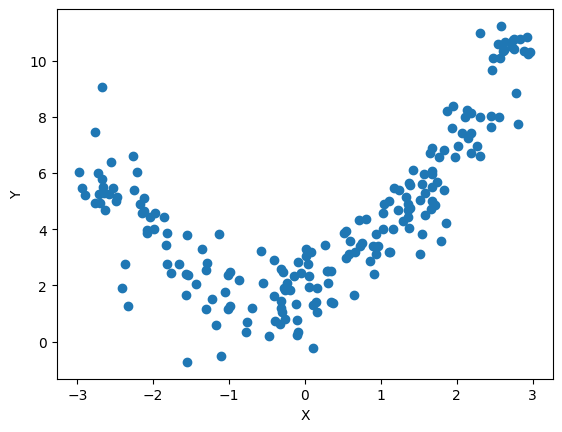

In [3]:
X = 6 * np.random.rand(200, 1) - 3 

Y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.scatter(X, Y) # scatter plot
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

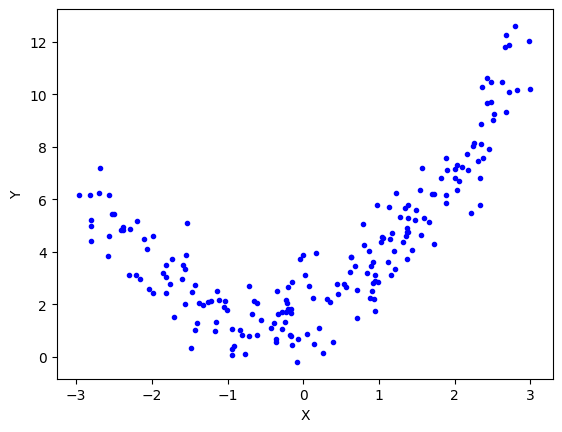

In [4]:
X = 6 * np.random.rand(200, 1) - 3 

Y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, Y, 'b.') # scatter plot in plot
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

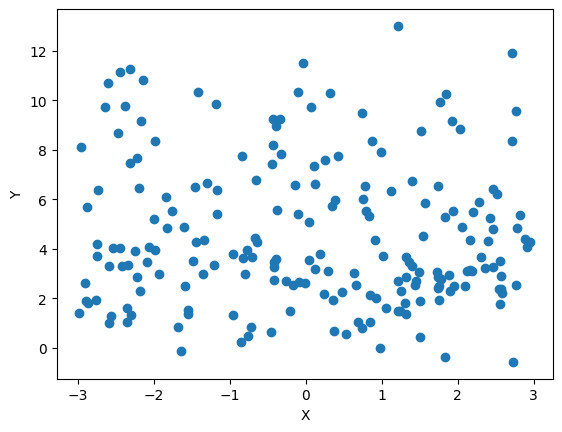

In [68]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
Y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.scatter(X, Y) # scatter plot
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

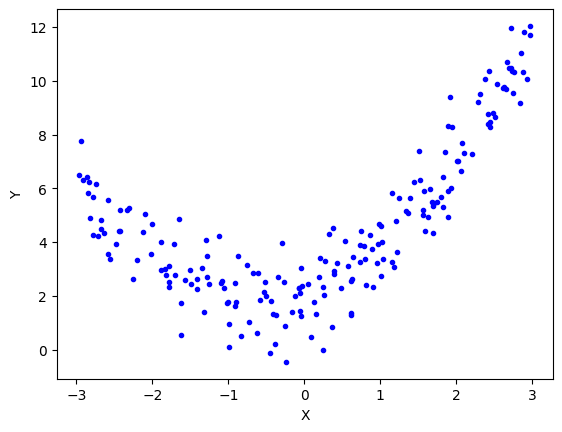

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
Y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, Y, 'b.')  # scatter plot in plot
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.2, random_state=2)

In [7]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.15309681832816113


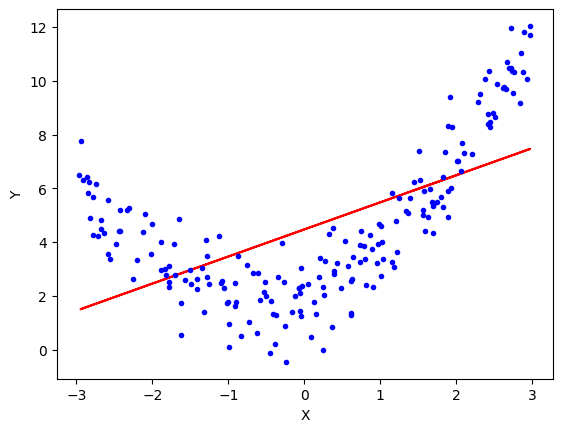

In [8]:
# P Plot
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

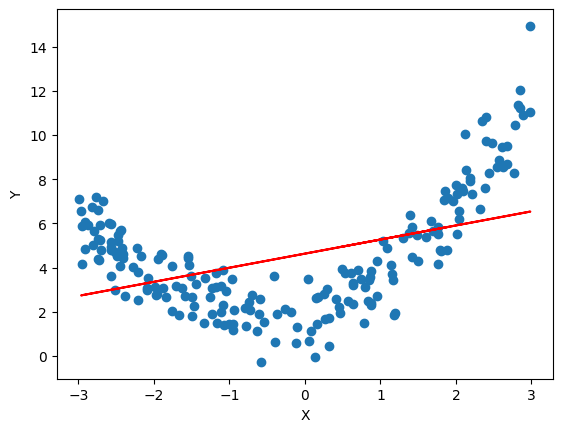

In [73]:
# scatter ploting
plt.plot(x_train, lr.predict(x_train), color="r")
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Apply Polynomial

In [74]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
poly.fit(x_train)
x_train_trans = poly.transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8521356808774285


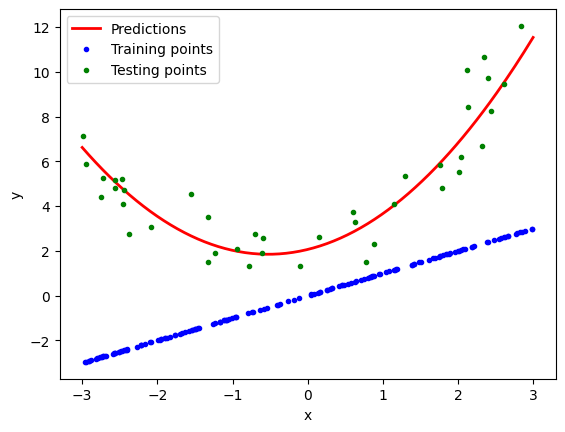

In [75]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, x_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()